# MOwNiT 
## Laboratorium
### Faktoryzacja
### Shelemekh Stanislav

## Zadanie 1
Ustal losowe (referencyjne) x rozmiaru 1000 oraz losowe A rozmiaru 1000x1000, policz b=A*x.
Nastepnie rozwiąż równanie Ax=b trzema metodami:
- inv()
- \
- factorize()

Porównaj jakość wyniku (zmierzoną jako długość różnicy wektorów wyniku oraz referencyjnego x) oraz czas wykonania (@time). UWAGA: pierwsze wykonanie funkcji w Julii zawiera czas kompilacji tej funkcji, dlatego czas mierzymy  od drugiego wywołania !

In [349]:
using(LinearAlgebra)

### Przygotowanie danych

In [350]:
# ustalam referencyjne x rozmiaru 1000 oraz A rozmiaru 1000x1000
x = rand(1000)
A = rand(1000, 1000)

1000×1000 Array{Float64,2}:
 0.96859    0.868805   0.802759    …  0.376116   0.367765   0.661337
 0.693499   0.969374   0.585716       0.952629   0.637781   0.342253
 0.323582   0.297014   0.295378       0.845474   0.648378   0.60749
 0.244715   0.336888   0.0662849      0.936802   0.955588   0.63504
 0.285961   0.0386992  0.272388       0.117848   0.0425625  0.241371
 0.160874   0.427434   0.502481    …  0.197888   0.607278   0.865902
 0.663444   0.311863   0.762481       0.828889   0.896952   0.384908
 0.647214   0.248499   0.961075       0.854536   0.77821    0.885477
 0.647228   0.583445   0.0864624      0.0757762  0.84852    0.333577
 0.54985    0.218836   0.905903       0.832056   0.635504   0.115673
 0.0342428  0.349285   0.575399    …  0.856018   0.473354   0.394493
 0.497436   0.437704   0.617528       0.925327   0.906167   0.580206
 0.683064   0.874876   0.894328       0.199634   0.33494    0.874304
 ⋮                                 ⋱                        
 0.471996   0.57

In [351]:
# liczę b=A*x
b = A * x

1000-element Array{Float64,1}:
 246.98824604604064
 255.51898900734525
 253.41454448966815
 257.35069160311315
 257.9246266998723
 260.5223500146211
 253.52912000749097
 255.75051079083363
 252.9142678285113
 251.85823179119203
 256.270503742228
 250.81696711745965
 251.19595309939004
   ⋮
 267.1262429701647
 256.0529724057077
 250.9291445212842
 248.44585351693664
 253.58830115977685
 247.04566797691848
 247.39679236877066
 259.534912784701
 248.35719996778872
 256.9608653617345
 241.1523589097157
 251.4277683369316

### Pomocnicza funkcja

In [352]:
function print_result(time, diff="")
    print("Czas wykonania: ", time)
    if (diff != "")
        print(". Niedokładność: ", diff)
    end
end

print_result (generic function with 2 methods)

### Pierwsza metoda: wykorzystanie funkcji inv()

In [353]:
inv(A) * b  # kompilowanie
inv_time = @elapsed inv_x = inv(A) * b # faktyczne liczenie czasu
diff_vec = x - inv_x
inv_err = sqrt(dot(diff_vec, diff_vec))
print_result(inv_time, inv_err)


Czas wykonania: 0.076426186. Niedokładność: 5.752031994051315e-10

### Druga metoda: wykorzystanie operatora '\\'

In [354]:
A \ b  # kompiliwanie
slash_time = @elapsed slash_x = A \ b # faktyczne liczenie czasu
diff_vec = x - slash_x
slash_err = sqrt(dot(diff_vec, diff_vec))
print_result(slash_time, slash_err)

Czas wykonania: 0.027024474. Niedokładność: 1.9643231068435593e-10

### Trzecia metoda: wykorzystanie funkcji factorize()

In [355]:
Af = factorize(A)
Af \ b  # kompiliwanie
fact_time = @elapsed fact_x = Af \ b # faktyczne liczenie czasu
diff_vec = x - fact_x
fact_err = sqrt(dot(diff_vec, diff_vec))
print_result(fact_time, fact_err)

Czas wykonania: 0.000960434. Niedokładność: 1.9643231068435593e-10

### Wnioski do zadania 1

- Jak widzimy, metoda korzystająca z funkcji inv() jest najwolniejsza i do tego ma najniższą jakość wyniku.
- Operator '\\' jest zoptymalizowany prz konkretnych typach macierzy (np. trójkątna) dlatego działa szybciej i z mniejszym błędem.
- Faktoryzowanie macierzy jeszcze bardziej przyspiesza znalezienie wyniku dlatego, że operator '\\' w swojej implementacji sprawdza A i jeżeli nie jest trójkątna, to faktoryzuje ją.

## Zadanie 2
Policz współczynniki wielomianu aproksymującego dowolne dane z poprzednich laboratoriów tworząc wprost układ równań i rozwiązujac go (metoda zaprezentowana na tym laboratorium).
Porównaj wyniki z tymi otrzymanymi poprzednio.

In [356]:
using PrettyTables
using DataFrames
using CSV

Wykorzystane dane opisują czas mnożenia wektora przez wektor zależnie od rozmiaru.

In [357]:
df=CSV.File("data.csv", delim=",")
pretty_table(df)

┌────────┬─────────┬──────────────┐
│   size │    time │ only_vectors │
│  Int64 │ Float64 │        Int64 │
├────────┼─────────┼──────────────┤
│ 790000 │    0.05 │            1 │
│ 810000 │    0.05 │            1 │
│ 810000 │    0.05 │            1 │
│ 810000 │    0.05 │            1 │
│ 810000 │    0.04 │            1 │
│ 810000 │    0.05 │            1 │
│ 810000 │    0.05 │            1 │
│ 810000 │    0.05 │            1 │
│ 810000 │    0.07 │            1 │
│ 810000 │    0.06 │            1 │
│ 810000 │    0.04 │            1 │
│ 830000 │    0.05 │            1 │
│ 830000 │    0.05 │            1 │
│ 830000 │    0.07 │            1 │
│ 830000 │    0.05 │            1 │
│ 830000 │    0.05 │            1 │
│ 830000 │    0.06 │            1 │
│ 830000 │    0.05 │            1 │
│ 830000 │    0.05 │            1 │
│ 830000 │    0.04 │            1 │
│ 830000 │    0.06 │            1 │
│   ⋮    │    ⋮    │      ⋮       │
└────────┴─────────┴──────────────┘


In [358]:
# Tworzymy macierz
xs = append!(Array{Int64,1}(), df.size)
ys = append!(Array{Float64,1}(), df.time)
A = zeros(length(xs), 3)
A[:,1]=xs.^2
A[:,2]=xs
A[:,3]=ones(length(xs))
A

101×3 Array{Float64,2}:
 6.241e11  790000.0  1.0
 6.561e11  810000.0  1.0
 6.561e11  810000.0  1.0
 6.561e11  810000.0  1.0
 6.561e11  810000.0  1.0
 6.561e11  810000.0  1.0
 6.561e11  810000.0  1.0
 6.561e11  810000.0  1.0
 6.561e11  810000.0  1.0
 6.561e11  810000.0  1.0
 6.561e11  810000.0  1.0
 6.889e11  830000.0  1.0
 6.889e11  830000.0  1.0
 ⋮                   
 9.409e11  970000.0  1.0
 9.409e11  970000.0  1.0
 9.801e11  990000.0  1.0
 9.801e11  990000.0  1.0
 9.801e11  990000.0  1.0
 9.801e11  990000.0  1.0
 9.801e11  990000.0  1.0
 9.801e11  990000.0  1.0
 9.801e11  990000.0  1.0
 9.801e11  990000.0  1.0
 9.801e11  990000.0  1.0
 9.801e11  990000.0  1.0

In [359]:
# Faktoryzacja macierzy
AF = factorize(A)

QRPivoted{Float64,Array{Float64,2}}
Q factor:
101×101 LinearAlgebra.QRPackedQ{Float64,Array{Float64,2}}:
 -0.0759039  -0.181069  -0.288054   -0.113011     …  -0.129104    -0.129104
 -0.0797958  -0.154734  -0.156181   -0.149001         0.162304     0.162304
 -0.0797958  -0.154734  -0.156181   -0.143917        -0.131575    -0.131575
 -0.0797958  -0.154734  -0.156181    0.961729        -0.0034318   -0.0034318
 -0.0797958  -0.154734  -0.156181   -0.0382712       -0.0034318   -0.0034318
 -0.0797958  -0.154734  -0.156181   -0.0382712    …  -0.0034318   -0.0034318
 -0.0797958  -0.154734  -0.156181   -0.0382712       -0.0034318   -0.0034318
 -0.0797958  -0.154734  -0.156181   -0.0382712       -0.0034318   -0.0034318
 -0.0797958  -0.154734  -0.156181   -0.0382712       -0.0034318   -0.0034318
 -0.0797958  -0.154734  -0.156181   -0.0382712       -0.0034318   -0.0034318
 -0.0797958  -0.154734  -0.156181   -0.0382712    …  -0.0034318   -0.0034318
 -0.083785   -0.126873  -0.0506555  -0.0242696     

In [360]:
AF.R\((Transpose(AF.Q) * ys)[1:3])
time = @elapsed appr = AF.R\((Transpose(AF.Q) * ys)[1:3])
print_result(time)

Czas wykonania: 0.039655658

In [361]:
fun(x) = appr[1]*x^2 + appr[2]x + appr[3]

fun (generic function with 1 method)

Przykładowe wywołanie

In [362]:
fun(990000)

0.060558764807666435

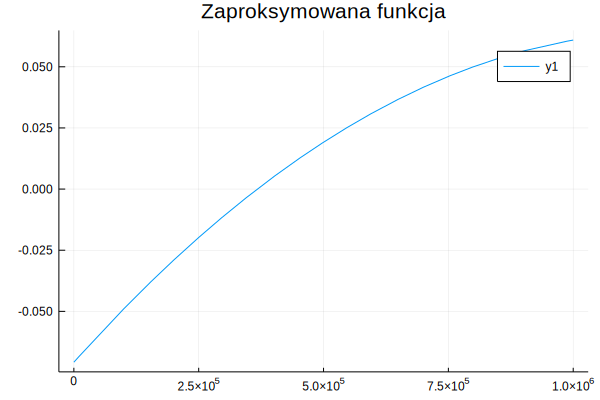

In [363]:
using Plots
plot(fun, 0, 1000000, title="Zaproksymowana funkcja")

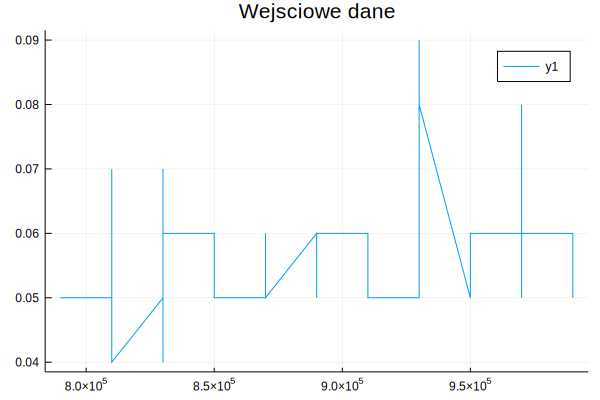

In [364]:
plot(xs, ys, title="Wejsciowe dane")

### Wnioski do zadania 2
- 1. Czas wykonania operacji lewego dzielenia nie zmniejszył się po faktoryzacji tak jak w pierwszym zadaniu, bo musiał zfaktoryzować faktor Q do trójkątnej macierzy.

## Zadanie 3

Znajdź i zaprezentuj działanie innego zastosowania wybranej faktoryzacji.

Algorytm QR szuka wartości własne macierzy. Po wystarczającej liczbie iteracji w głównej przekątnej wynikowej macierzy będziemy mieli wartości własne wejściowej macierzy.

In [365]:
function qr_algorithm(M, n)
    U = Diagonal(ones(size(M)[1]))
    for k in 1:n
        (Q, R) = qr(M)
        M = R * Q
        U = U * Q
    end
    return M
end

qr_algorithm (generic function with 2 methods)

In [366]:
A = [3 2; 4 1]

2×2 Array{Int64,2}:
 3  2
 4  1

In [367]:
A = qr_algorithm(A, 10)

2×2 Array{Float64,2}:
 5.0       -2.0
 4.608e-7  -1.0

Mamy wynik: 5.0 i -1.0, są wartościamy własnymi macierzy.